<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1.1
# *Evaluating Classification Models*

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Breast Cancer" data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

%matplotlib inline

### 1. Load Data

From UCI's Machine Learning Repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/


Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g) concavity (severity of concave portions of the contour)
    h) concave points (number of concave portions of the contour)
    i) symmetry
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
breast_cancer_csv = 'C:/IOD/Data/breast-cancer-wisconsin-data.csv'

### 2. EDA

Explore dataset. Check for nulls. Make the target column binary.

In [4]:
df = pd.read_csv(breast_cancer_csv)
df = df.set_index("id")
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [6]:
df = df.dropna(axis=1)
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

#### 3.2 Calculate the predicted labels and predicted probabilities on the test set.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [8]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [9]:
# Build Model
logreg = LogisticRegression()

# Fit Model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
logreg.fit(X_train,y_train)


C:\Users\canvd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
# predict test class:
y_predict=logreg.predict(X_test)

# predicted test probability:
print(accuracy_score(y_test,y_predict))

0.9473684210526315


In [11]:
from sklearn.metrics import classification_report

report = classification_report(y_test,y_predict)

print(report)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



#### 3.3 Create the confusion matrix for your classfier's performance on the test set.

Convert confusion_matrix to a dataframe.

    columns=['predicted_healthy', 'predicted_cancer']
    index=['is_healthy', 'is_cancer']

In [12]:
# ANSWER
from sklearn.metrics import confusion_matrix
confusion_matrix_values = confusion_matrix(y_test, y_predict)
confusion_df = pd.DataFrame(confusion_matrix_values, columns=['predicted_healthy', 'predicted_cancer'], index=['is_healthy', 'is_cancer'])
print(confusion_df)

            predicted_healthy  predicted_cancer
is_healthy                 70                 2
is_cancer                   4                38


In [13]:
TP = confusion_df.loc['is_healthy','predicted_healthy']
TN = confusion_df.loc['is_cancer','predicted_cancer']
FP = confusion_df.loc['is_cancer','predicted_healthy']
FN = confusion_df.loc['is_healthy','predicted_cancer']

#### 3.4 Calculate Accuracy

**Classification Accuracy:** Overall, how often is the classifier correct?

    (TP + TN) / float(TP + TN + FP + FN)

In [14]:
# ANSWER
# use float to perform true division, not integer division
class_acc = (TP + TN) / float(TP + TN + FP + FN)
class_acc

0.9473684210526315

#### 3.5 Calculate Classification Error

**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

    (FP + FN) / float(TP + TN + FP + FN)

In [15]:
# ANSWER
class_err = (FP + FN) / float(TP + TN + FP + FN)
class_err

0.05263157894736842

#### 3.6 Calculate Sensitivity

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN

    sensitivity = TP / float(FN + TP)

In [16]:
# ANSWER
sensitivity = TP / float(FN + TP)
sensitivity

0.9722222222222222

#### 3.7 Calculate Specificity

**Specificity:** When the actual value is negative, how often is the prediction correct?

- Something we want to maximize. How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / all negative
    - all negative = TN + FP

    specificity = TN / (TN + FP)

In [17]:
# ANSWER
specificity = TN / (TN + FP)
specificity

0.9047619047619048

#### 3.8 Calculate False Positive Rate

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

    false_positive_rate = FP / float(TN + FP)

In [18]:
# ANSWER
false_positive_rate = FP / float(TN + FP)
false_positive_rate

0.09523809523809523

#### 3.9 Calculate Precision

**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

    precision = TP / float(TP + FP)

In [19]:
# ANSWER
precision = TP / float(TP + FP)
precision

0.9459459459459459

#### 3.10 Create a predicted test probability dataframe with column names 'class_0_pp','class_1_pp'

In [27]:
# ANSWER
# Get the predicted probability vector and explicitly name the columns:)
pred_proba = pd.DataFrame(data = logreg.predict_proba(X_test),columns=['class_0_pp', 'class_1_pp'])
pred_proba

,class_0_pp,class_1_pp
0,0.698269,0.301731
1,0.316178,0.683822
2,0.996111,0.003889
3,0.001263,0.998737
4,0.190911,0.809089
...,...,...
109,0.017200,0.982800
110,0.872954,0.127046
111,0.980612,0.019388
112,0.463484,0.536516


#### 3.11 The Receiver operating characteristic (ROC) curve

Plot the ROC curve for Class 1

In [21]:
from sklearn.metrics import roc_curve, auc

<Figure size 800x800 with 0 Axes>

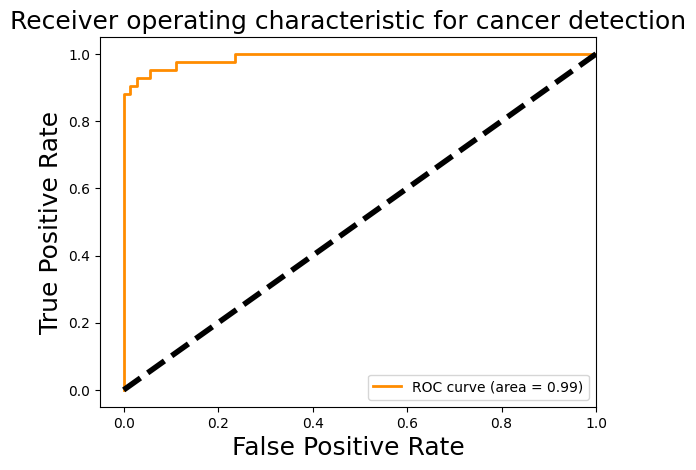

In [28]:
# For class 1, find the area under the curve
preds = logreg.predict_proba(X_test)[:,1]
# Find fpr, tpr
fpr, tpr, _ = roc_curve(y_test, preds)
# Find auc
roc_auc = auc(fpr, tpr)
# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])

# Plot fpr, tpr
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



